In [3]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/Users/mollyagostino/Desktop/Motor_Vehicle_Collisions_-_Crashes.csv')

/var/folders/rm/x5gdmk5j6c14pyxsftg8m3700000gn/T/ipykernel_5534/312519614.py:4: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/Users/mollyagostino/Desktop/Motor_Vehicle_Collisions_-_Crashes.csv')


In [9]:
df

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,CRASH DATETIME
0,09/11/2021,2:39,NaN,NaN,NaN,NaN,NaN,WHITESTONE EXPRESSWAY,20 AVENUE,NaN,...,NaN,NaN,NaN,4455765,Sedan,Sedan,NaN,NaN,NaN,2021-09-11 02:39:00
1,03/26/2022,11:45,NaN,NaN,NaN,NaN,NaN,QUEENSBORO BRIDGE UPPER,NaN,NaN,...,NaN,NaN,NaN,4513547,Sedan,NaN,NaN,NaN,NaN,2022-03-26 11:45:00
2,11/01/2023,1:29,BROOKLYN,11230.0,40.621790,-73.970024,"(40.62179, -73.970024)",OCEAN PARKWAY,AVENUE K,NaN,...,Unspecified,NaN,NaN,4675373,Moped,Sedan,Sedan,NaN,NaN,2023-11-01 01:29:00
3,06/29/2022,6:55,NaN,NaN,NaN,NaN,NaN,THROGS NECK BRIDGE,NaN,NaN,...,NaN,NaN,NaN,4541903,Sedan,Pick-up Truck,NaN,NaN,NaN,2022-06-29 06:55:00
4,09/21/2022,13:21,NaN,NaN,NaN,NaN,NaN,BROOKLYN BRIDGE,NaN,NaN,...,NaN,NaN,NaN,4566131,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN,2022-09-21 13:21:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2168827,03/29/2025,14:00,BROOKLYN,11212.0,40.663240,-73.926770,"(40.66324, -73.92677)",NaN,NaN,78 E 94 ST,...,NaN,NaN,NaN,4805306,Sedan,NaN,NaN,NaN,NaN,2025-03-29 14:00:00
2168828,01/30/2025,1:26,BRONX,10460.0,40.836660,-73.864160,"(40.83666, -73.86416)",NaN,NaN,1442 LELAND AVE,...,NaN,NaN,NaN,4805232,Sedan,Dump,NaN,NaN,NaN,2025-01-30 01:26:00
2168829,04/11/2025,13:06,NaN,NaN,40.679090,-74.003440,"(40.67909, -74.00344)",GOWANUS EXPY,HAMILTON AVE,NaN,...,NaN,NaN,NaN,4805099,Sedan,Box Truck,NaN,NaN,NaN,2025-04-11 13:06:00
2168830,04/08/2025,10:30,BRONX,10452.0,40.842320,-73.914910,"(40.84232, -73.91491)",NaN,NaN,1514 TOWNSEND AVE,...,NaN,NaN,NaN,4804967,Station Wagon/Sport Utility Vehicle,Sedan,NaN,NaN,NaN,2025-04-08 10:30:00


/var/folders/rm/x5gdmk5j6c14pyxsftg8m3700000gn/T/ipykernel_5534/2583195797.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



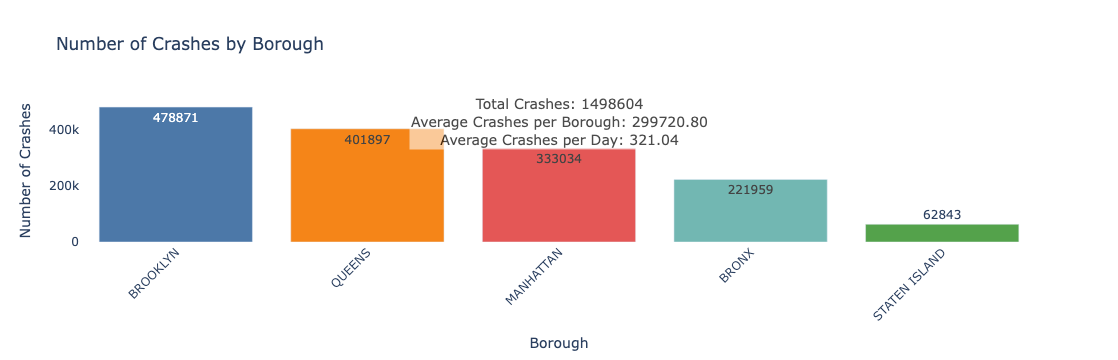

In [18]:
#I are cleaned the crash data by removing rows with missing borough information and calculating the total number of crashes, 
#average crashes per borough, and average crashes per day. Then, I created an interactive bar chart using Plotly, with additional annotations showing summary statistics for the entire dataset.


import pandas as pd
import plotly.express as px

df_clean = df.dropna(subset=['BOROUGH'])

df_clean['CRASH DATE'] = pd.to_datetime(df_clean['CRASH DATE'], errors='coerce')

borough_counts = df_clean['BOROUGH'].value_counts().reset_index()
borough_counts.columns = ['Borough', 'Number of Crashes']

total_crashes = borough_counts['Number of Crashes'].sum()
average_crashes = borough_counts['Number of Crashes'].mean()

unique_dates = df_clean['CRASH DATE'].nunique()
average_crashes_per_day = total_crashes / unique_dates

fig = px.bar(borough_counts,
             x='Borough',
             y='Number of Crashes',
             title=f'Number of Crashes by Borough ',
             labels={'Borough': 'Borough', 'Number of Crashes': 'Number of Crashes'},
             color='Borough', 
             color_discrete_sequence=px.colors.qualitative.T10,  
             text='Number of Crashes')  


fig.update_layout(
    xaxis_title='Borough',
    yaxis_title='Number of Crashes',
    xaxis_tickangle=-45,  
    plot_bgcolor='rgba(0,0,0,0)',  
    paper_bgcolor='rgba(255,255,255,0.8)',  
    showlegend=False  
)


fig.update_traces(
    hovertemplate='<b>%{x}</b><br>Crashes: %{y}<br><extra></extra>'  
)


fig.add_annotation(
    x=0.5, y=1.05, xref='paper', yref='paper',
    text=f'Total Crashes: {total_crashes}<br>Average Crashes per Borough: {average_crashes:.2f}<br>Average Crashes per Day: {average_crashes_per_day:.2f}',
    showarrow=False, font=dict(size=14, color='black'),
    align='center', bgcolor='rgba(255,255,255,0.8)', opacity=0.7
)

fig.show()


In [ ]:
#This interactive bar chart displays the number of vehicle crashes by borough in New York City. Brooklyn has the highest number of
#crashes, totaling 478,871, followed by Queens with 401,897. Manhattan and the Bronx reported 333,034 and 221,959 crashes and
# Staten Island had the fewest at 62,843. In total, there were 1,498,604 crashes across all five boroughs. On average, this equates
#to about 299,720 crashes per borough and approximately 321 crashes per day.